# Class 6: Array computations

In this notebook we explore computations on arrays of data. 

In [176]:
import YData

# YData.download.download_class_code(6)   # get class 4 code    
# YData.download.download_class_code(6, True) # get the code with the answers 

# The following function will download the second homework
#YData.download_homework(3)  # downloads the second homework 


In [177]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')


### Downloading the data for today's class

Please run the code in the cell below to download the data for today's class.

In [178]:
import YData

YData.download_data("nba_salaries_2022_23_all.csv")
YData.download_data("movies.csv")
YData.download_data('US_Gasoline_Prices_Weekly.csv')

The file `nba_salaries_2022_23_all.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `US_Gasoline_Prices_Weekly.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


## 0. Warm-up exercises: NBA salaries

Let's do some warm-up exercises by looking at statistics of basketball players in the NBA! The data we will analyze contains infomration about each player including their salary from the 2022-2023 season listed in millions of dollars. This table can be found online: https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season

We will load the data as a "pandas DataFrame" which is a data structure we will discuss more in a couple of weeks. We will then convert the data to lists to explore it further. The lists we are creating are:

- `name_list`: A list of the basketball players' names
- `salary_list`: A list of salaries
- `position_list`: A list of the positions each player plays
- `team_list`: A list of which team each player is on
- `points_per_game_list`: A list showing the average number of points each player scored per game


In [179]:
# load the data and display the first 6 rows

import YData
import pandas as pd

#YData.download_data("nba_salaries_2022_23_all.csv")
nba = pd.read_csv("nba_salaries_2022_23_all.csv")  # load in the data

nba[["Player Name", "Salary", "Position", "Team", "PTS"]].head()  # show the first 6 rows


,Player Name,Salary,Position,Team,PTS
0,Stephen Curry,48070014,PG,GSW,29.4
1,John Wall,47345760,PG,LAC,11.4
2,Russell Westbrook,47080179,PG,LAL/LAC,15.9
3,LeBron James,44474988,PF,LAL,28.9
4,Kevin Durant,44119845,PF,BRK/PHO,29.1


In [180]:
# extract the salaries and the player positions as lists

name_list = nba["Player Name"].to_list()
salary_list = nba["Salary"].to_list()
position_list = nba["Position"].to_list()
team_list = nba["Team"].to_list()
points_per_game_list = nba["PTS"].to_list()


### Warm-up exercise 1: Categorical analyses

Can you do the following:
- Calculate the proportion of players who play on the Boston Celtics ("BOS")?

If you finish the other warm-up exercises, you can also try creating a bar plot showing the number of players on the Boston Celtics ("BOS"), New York Knicks ("NYK") and Golden State Warriors ("GSW").

In [181]:
# Proportion of players on the Celtics
team_list.count('BOS')/len(team_list)


0.034261241970021415

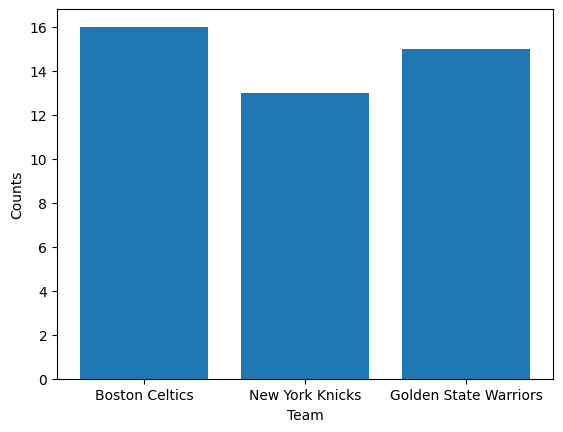

In [182]:
# If you finish the other warm-up exercies, you can create a bar plot showing the number of players on "BOS", "NYK", and "GSW"

import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of counts of players on the three teams
team_counts = [team_list.count("BOS"), 
               team_list.count("NYK"),
               team_list.count('GSW')]

# Create the team names
team_names = ["Boston Celtics", "New York Knicks", "Golden State Warriors"]


# Create a bar chart of how many players are on each team. Be sure to label your axes!
plt.bar(team_names, team_counts);
plt.ylabel("Counts");
plt.xlabel("Team");


### Warm-up exercise 2: One quantitative variable analyses

Can you do the following:

1. Create a histogram of the player salaries
2. Calculate the mean salary, the median salary, and the standard deviation of salaries
3. Calcualte the z-score for the first player's salary (i.e., Stephen Curry's salary)


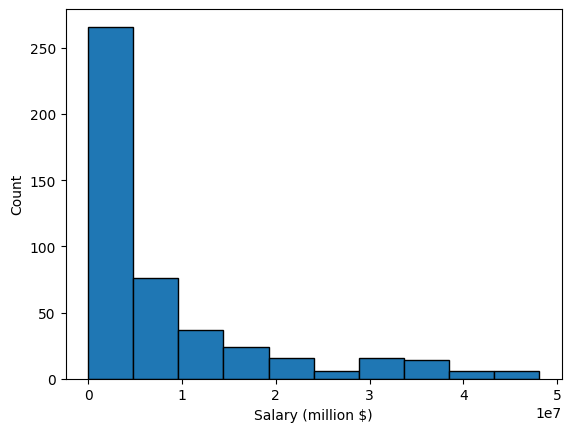

In [183]:
# Plot a histogram of NBA salaries

plt.hist(salary_list, edgecolor = "k");
plt.ylabel("Count");
plt.xlabel("Salary (million $)");

In [184]:
import statistics

# mean salary
print(sum(salary_list)/len(salary_list))
print(statistics.mean(salary_list))

# median salary
statistics.median(salary_list)

# standard deviation of salaries
statistics.stdev(salary_list)


8416598.74732334
8416598.74732334


10708118.046519598

In [185]:
# z-score for the first player's salary (i.e., z-score for Stephen Curry's salary)

(salary_list[0] - statistics.mean(salary_list))/statistics.stdev(salary_list)


3.7031171192182546

### Warm-up exercise 3: Two-quantitative variables

Can you do the following:

1. Create a scatter plot of salary as a function of the points scored per game
2. Guess what you believe correlation is between salary and points per game, and then calculate the correlation to see if your guess was close.


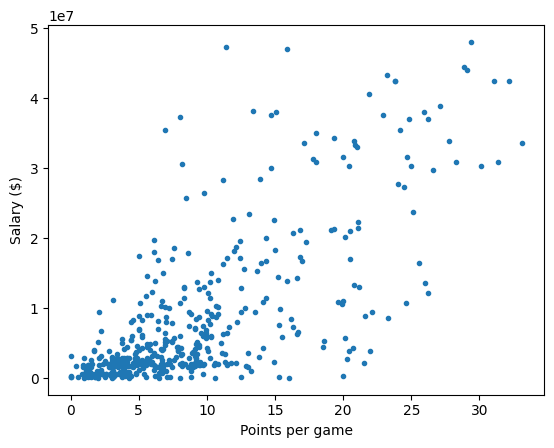

In [186]:
plt.plot(points_per_game_list, salary_list, '.');
plt.xlabel("Points per game");
plt.ylabel("Salary ($)");

In [187]:
# guess the correlation and then calculate it
statistics.correlation(points_per_game_list, salary_list)

0.7275966928493115

## 1. Creating NumPy Arrays

Often we want to process data that is all of the same type. For example, we might want to do processing on a data set of numbers (e.g., if we were just analyzing salary data). 

When we have data that is all of the same type, there are faster ways to process data than using a list. In Python, the `numpy` package offers ways to store and process data that is all of the same type using a data structure called a `ndarray`. There are also functions that operate on `ndarrays` that can do computations very efficiently. 

Let's explore this now!

In [188]:
# import the numpy package
import numpy as np

In [189]:
# create an ndarry of numbers
a_list = [2, 3, 4, 5]
an_array = np.array(a_list)

an_array

array([2, 3, 4, 5])

In [190]:
# we can get the type of elements in an array by accessing the dtype property
an_array.dtype

dtype('int64')

In [191]:
# get the size of the array
an_array.shape

(4,)

In [192]:
# create an array of strings
string_array = np.array(["a", "b", "c"])
string_array

array(['a', 'b', 'c'], dtype='<U1')

In [193]:
# get the type in the string array
string_array.dtype      # < little endian, U unicode, 1 bit

dtype('<U1')

In [194]:
# create a boolean array
boolean_array = np.array([True, True, False])
boolean_array

array([ True,  True, False])

In [195]:
# get the type in the boolean array
boolean_array.dtype

dtype('bool')

In [196]:
# what happens if we make an array from a list of mixed values
mixed_array = np.array([1, 2, "three"])
mixed_array

array(['1', '2', 'three'], dtype='<U21')

In [197]:
# get the dtype 
mixed_array.dtype

dtype('<U21')

In [198]:
# get the 0th element of the mixed_array
mixed_array[0]

np.str_('1')

In [199]:
# get the type of the 0th element
type(mixed_array[0])

numpy.str_

In [200]:
# is the 0th element equal to the integer 1? 
mixed_array[0] == 1

False

In [201]:
# is the 0th element equal to the string '1'? 
mixed_array[0] == '1'

True

In [202]:
# create sequential numbers 1 to 9
sequential_nums = np.arange(1, 10)      


## 2. NumPy functions on numerical arrays

The NumPy package has a number of functions that operate very efficiently on numerical ndarrays.

Let's explore these functions by looking at the price of gas!

The data comes from: https://www.eia.gov/opendata/v1/qb.php?category=240692&sdid=PET.EMM_EPM0_PTE_NUS_DPG.W

In [203]:
# If loading the data using pandas_datareader.fred doesn't work, you can uncomment this code and load this alternative data from 2023

##  Download the data - code based on a fixed .csv file
#YData.download.download_data('US_Gasoline_Prices_Weekly.csv')
#import pandas as pd
#gas_data_all = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0])  # load in the data
#gas_data_all.head()
#gas_data_recent = gas_data_all[(gas_data_all['Week'] > '2023-01-01') & (gas_data_all['Week'] < '2024-01-01')] 
#gas_prices = gas_data_recent["DollarsPerGallon"].values
#gas_dates = gas_data_recent["Week"].values

In [204]:
# Read in the price of gas directly from the FRED

from pandas_datareader.fred import FredReader

end_year = 2025

# get gas prices starting in 2019
gas_data_all = FredReader("GASREGW", start='2019-06-01', end= str(end_year) + "-09-01").read().reset_index() 

# reduce to gas prices for only last year
gas_data_recent = gas_data_all[(gas_data_all['DATE'] > str(end_year -1) + '-01-01') & (gas_data_all['DATE'] < str(end_year) + '-01-01')] 

# display the first 5 rows of the data table
display(gas_data_recent.head())

# Get an ndarray of the gas prices from each week of 2023
# You can ignore this code for now...
gas_prices = gas_data_recent["GASREGW"].values
gas_dates = gas_data_recent["DATE"].values

# print the first 5 prices and first 5 dates
print(gas_prices[0:5])
print(gas_dates[0:5])

,DATE,GASREGW
240,2024-01-08,3.073
241,2024-01-15,3.058
242,2024-01-22,3.062
243,2024-01-29,3.095
244,2024-02-05,3.136


[3.073 3.058 3.062 3.095 3.136]
['2024-01-08T00:00:00.000000000' '2024-01-15T00:00:00.000000000'
 '2024-01-22T00:00:00.000000000' '2024-01-29T00:00:00.000000000'
 '2024-02-05T00:00:00.000000000']


In [205]:
# we have prices for all 52 weeks 
gas_prices.shape   

(52,)

In [206]:
# One dollar is currently 147 Yen. What has been the price of a gallon of gas cost in Yen? 
# What have gas prices been in Euros? 
gas_prices * 147

array([451.731, 449.526, 450.114, 454.965, 460.992, 469.224, 480.543,
       477.603, 492.45 , 496.272, 507.591, 517.881, 516.999, 527.877,
       533.316, 539.196, 536.991, 535.521, 530.376, 526.848, 525.819,
       516.852, 504.063, 504.945, 505.386, 511.413, 512.883, 513.912,
       510.237, 512.148, 506.856, 501.858, 497.154, 487.011, 483.483,
       475.692, 467.46 , 468.195, 467.313, 460.992, 466.137, 462.168,
       455.259, 451.143, 448.644, 447.762, 447.468, 445.998, 442.176,
       443.352, 444.528, 441.882])

In [207]:
# what if there was a constant tax of $2 on each gallon purchased? 
gas_prices + 2

array([5.073, 5.058, 5.062, 5.095, 5.136, 5.192, 5.269, 5.249, 5.35 ,
       5.376, 5.453, 5.523, 5.517, 5.591, 5.628, 5.668, 5.653, 5.643,
       5.608, 5.584, 5.577, 5.516, 5.429, 5.435, 5.438, 5.479, 5.489,
       5.496, 5.471, 5.484, 5.448, 5.414, 5.382, 5.313, 5.289, 5.236,
       5.18 , 5.185, 5.179, 5.136, 5.171, 5.144, 5.097, 5.069, 5.052,
       5.046, 5.044, 5.034, 5.008, 5.016, 5.024, 5.006])

In [208]:
# basic functions of: min, max, etc.
print([np.min(gas_prices), np.max(gas_prices)])

[np.float64(3.006), np.float64(3.668)]


In [209]:
# if you bought one gallon each week, what would you pay over the whole year? 
print(np.sum(gas_prices))  

172.01500000000001


In [210]:
# what do you pay on average? 
print(np.mean(gas_prices))
print(np.median(gas_prices))

3.3079807692307694
3.301


In [211]:
# If you bought one gallon each week, how much would you pay at the end of each of the weeks of the year? 
np.cumsum(gas_prices)

array([  3.073,   6.131,   9.193,  12.288,  15.424,  18.616,  21.885,
        25.134,  28.484,  31.86 ,  35.313,  38.836,  42.353,  45.944,
        49.572,  53.24 ,  56.893,  60.536,  64.144,  67.728,  71.305,
        74.821,  78.25 ,  81.685,  85.123,  88.602,  92.091,  95.587,
        99.058, 102.542, 105.99 , 109.404, 112.786, 116.099, 119.388,
       122.624, 125.804, 128.989, 132.168, 135.304, 138.475, 141.619,
       144.716, 147.785, 150.837, 153.883, 156.927, 159.961, 162.969,
       165.985, 169.009, 172.015])

In [212]:
# How much does the gas price go up and down each week? 
np.diff(gas_prices)

array([-0.015,  0.004,  0.033,  0.041,  0.056,  0.077, -0.02 ,  0.101,
        0.026,  0.077,  0.07 , -0.006,  0.074,  0.037,  0.04 , -0.015,
       -0.01 , -0.035, -0.024, -0.007, -0.061, -0.087,  0.006,  0.003,
        0.041,  0.01 ,  0.007, -0.025,  0.013, -0.036, -0.034, -0.032,
       -0.069, -0.024, -0.053, -0.056,  0.005, -0.006, -0.043,  0.035,
       -0.027, -0.047, -0.028, -0.017, -0.006, -0.002, -0.01 , -0.026,
        0.008,  0.008, -0.018])

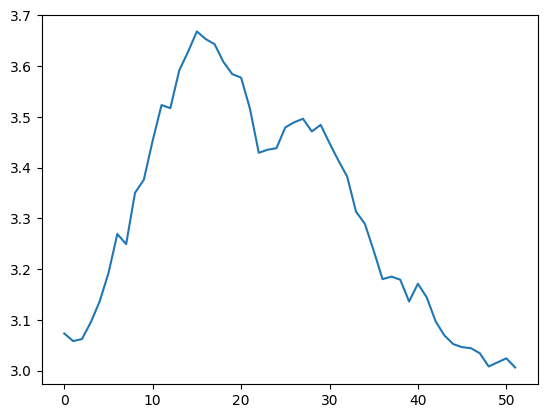

In [213]:
# plot the gas prices
plt.plot(gas_prices);  

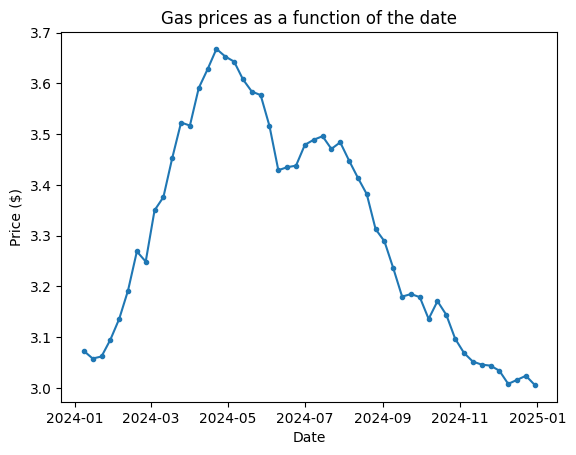

In [214]:
# plot the gas prices better!
plt.plot(gas_dates, gas_prices, '.-');  
plt.xlabel("Date");
plt.ylabel("Price ($)")
plt.title("Gas prices as a function of the date");

<br>
<br>
<br>
<p>
<center><img src=https://cdn.quotesgram.com/img/69/59/1803591020-high-gas-prices.jpg></center>

## 3. Boolean arrays

We can easily compare all values in an ndarray to a particular value. The result will return an ndarray of Booleans. 

Since Boolean `True` values are treated as 1's, and Boolean `False` values are treated as 0's, this makes it easy to see how many values in an array meet particular conditions. 

In [215]:
# Test all values in an array that are less than 5
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5

array([False,  True, False,  True,  True,  True, False,  True])

In [216]:
# How many values are less than 5?
np.sum(my_array < 5)

np.int64(5)

In [217]:
# How many (and what proportion) of weeks in 2023 were gas prices were below $3.50?
np.sum(gas_prices < 3.50)

np.int64(41)

### Example: What proportion of movies passed the Bechdel test revisited 

Let's calculate (again) the proportion of movies that passed the Bechdel test, but this time using numpy array computations. 

The code below loads the Bechdel data, and we will focus on the `bechdel` list, which is a list of strings saying whether movies passed ('PASS') or failed ('FAIL') the Bechdel test.



In [218]:
import YData
import pandas as pd

#YData.download_data("movies.csv")

movies = pd.read_csv("movies.csv")
col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']
movies =   movies[col_names_to_keep]

movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])


# get lists of data for our data analysis
title = movies["title"].to_list()
bechdel = movies["binary"].to_list()
bechdel_reason = movies["clean_test"].to_list()

domgross_2013 = movies["domgross_2013"].to_list()
budget_2013 = movies["budget_2013"].to_list() 
year = movies["year"].to_list()


bechdel[0:5]


['FAIL', 'PASS', 'FAIL', 'FAIL', 'FAIL']

In [219]:

# convert the list to an ndarray
bechdel_array = np.array(bechdel)


# create a Boolean array of that is True for movies that passed the Bechdel test
passed_booleans = bechdel_array == "PASS"
print(passed_booleans[0:5])


# calculate the proportion of movies that passed the Bechdel test
print(np.sum(passed_booleans)/passed_booleans.shape[0])


# alternatively, we can use the np.mean() function 
np.mean(passed_booleans)



[False  True False False False]
0.44707207207207206


np.float64(0.44707207207207206)

## 4. Boolean subsetting/indexing/masking

We can also use Boolean arrays to return values in another array. This is referred to as "Boolean Subsetting", Boolean masking" or "Boolean indexing"


In [220]:
# initial array
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])

# create Boolean array for values less than 5
boolean_array = my_array < 5    

print(boolean_array)

# get values of my_array that are less than 5
my_array[boolean_array]


[False  True False  True  True  True False  True]


array([4, 3, 4, 3, 4])

### Example: calculate the average revenue for movies that passed the Bechdel test 

In [221]:
# Calculate the average revenue for movies that passed the Bechdel test 

# create an ndarray of revenues
domgross_2013_array = np.array(domgross_2013)

# use the boolean mask to extract movies the pass the Bechdel test
passed_domgross_2013 = domgross_2013_array[passed_booleans]
print(len(passed_domgross_2013))

# get the average revenue of movies that passed the Bechdel test
np.mean(passed_domgross_2013)

794


np.float64(79591918.51259446)

## 5. Percentiles

The $p^{th}$ percentile is the value of a quantitative variable which is greater than $p$ percent of the data. 

We can calculate percentiles using the numpy function `np.percentile()`

Let's calculate the 25th, 50th, and 75th percentile for the Bechdel movie revenue data.


In [222]:
## Get the 25th, 50th and 75th percentile of movie revenues

bechdel_percentiles = np.percentile(domgross_2013_array, [25, 50, 75])

bechdel_percentiles


array([2.05465938e+07, 5.59936405e+07, 1.21678352e+08])

Question: What is another way to calculate the 50th percentile? 


In [223]:
# A: The 50th percentile is the median so we can also calculate it using np.median()

np.median(domgross_2013_array)

np.float64(55993640.5)

Other commonly calculated statistics include:

- **Five Number Summary:** (minimum, $Q_1$, median, $Q_3$, maximum)
- **Range:** maximum – minimum
- **Interquartile range (IQR):** = $Q_3$ – $Q_1$

Where:
- $Q_1$ = $25^{th}$ percentile
- $Q_3$ = $75^{th}$ percentile

Let's calculate these for the Bechdel revenue data...


In [224]:
# Range

np.max(domgross_2013_array) - np.min(domgross_2013_array)


np.float64(1771681891.0)

In [225]:
# Interquartile range (IQR)

print(np.percentile(domgross_2013_array, 75) - np.percentile(domgross_2013_array, 25))


# Alternatively
np.diff(np.percentile(domgross_2013_array, [25, 75]))


101131758.25


array([1.01131758e+08])

In [226]:
# Five number summary

five_num = np.array([np.min(domgross_2013_array), 
                     np.percentile(domgross_2013_array, 25),
                     np.percentile(domgross_2013_array, 50),
                     np.percentile(domgross_2013_array, 75),
                     np.max(domgross_2013_array)])

print(five_num)


# Alternatively

np.percentile(domgross_2013_array, [0, 25, 50, 75, 100])


[8.99000000e+02 2.05465938e+07 5.59936405e+07 1.21678352e+08
 1.77168279e+09]


array([8.99000000e+02, 2.05465938e+07, 5.59936405e+07, 1.21678352e+08,
       1.77168279e+09])

## 5. Box plots

A box plot is a graphical display of the five-number summary and consists of:

   1. Drawing a box from Q1  to Q3   

   2. Dividing the box with a line (or dot) drawn at the median

   3. Draw a line from each quartile to the most extreme data value that is not and outlier

   4. Draw a dot/asterisk for each outlier data point.


Create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test


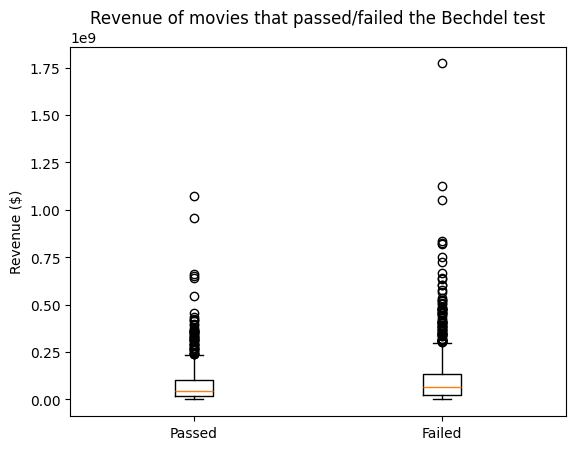

In [227]:
# get the movies that failed the Bechdel test
failed_domgross_2013 = domgross_2013_array[bechdel_array == "FAIL"]


# create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test
plt.boxplot([passed_domgross_2013, failed_domgross_2013], 
            tick_labels= ["Passed", "Failed"]);
plt.ylabel("Revenue ($)");
plt.title("Revenue of movies that passed/failed the Bechdel test");



In [228]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_06_answers.ipynb --cache-refresh --to pdf 